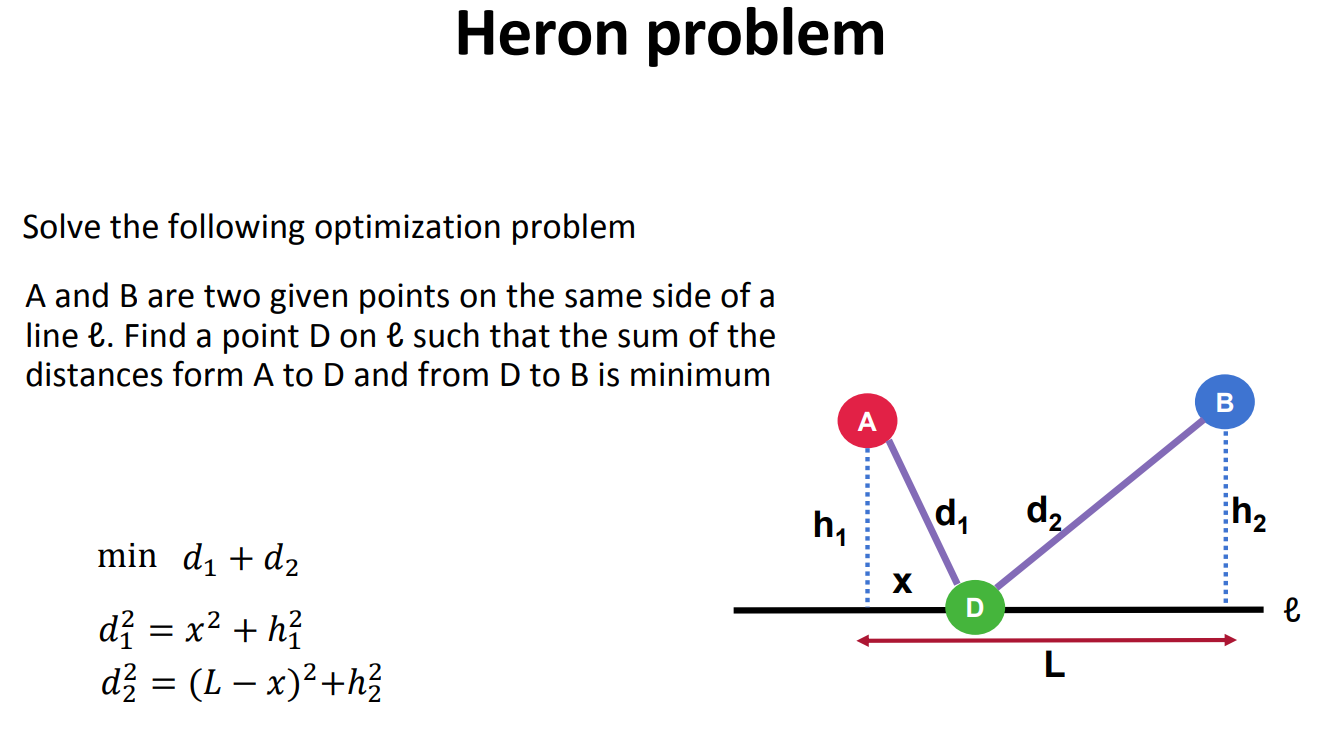

 ### Google Colab

In [1]:
!pip install -q pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
ipopt_executable = '/content/ipopt'

     |████████████████████████████████| 9.2 MB 5.0 MB/s 
     |████████████████████████████████| 49 kB 853 kB/s 


## Mac-OS

In [2]:
!pip install -q pyomo
!curl -s https://ampl.com/dl/open/ipopt/ipopt-osx.zip --output ipopt-osx.zip
!tar xf ipopt-osx.zip ipopt
ipopt_executable = "./ipopt"
!rm ipopt-osx.zip

## Window PC

In [ ]:
!conda install -c conda-forge pyomo pyomo.extras
!conda install -c conda-forge/label/cf201901 ipopt 

In [1]:
from pyomo.environ import *
import numpy as np
# heron problem

In [2]:
model = ConcreteModel()
model.L=Param(initialize=10)
model.h1=Param(initialize=2)
model.h2=Param(initialize=4)


model.d1=Var(bounds=(0,10), initialize=0)
model.d2=Var(bounds=(0,10), initialize=0)
model.x=Var(bounds=(0,model.L), initialize=0)


model.C1=Constraint(expr=  model.d1**2==model.h1**2+model.x**2)
model.C2=Constraint(expr=  model.d2**2==model.h2**2+(model.L-model.x)**2)
model.f1=Objective(expr=model.d1+model.d2,sense=minimize )

In [5]:
opt = SolverFactory('ipopt')
results = opt.solve(model, tee=True) # solves an

Ipopt 3.12.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        3
                     variables with only upper bounds:        0
Tot

In [4]:
print('d1=' , round(value(model.d1),2))
print('d2=' ,round(value(model.d2),2))
print('x=' ,round(value(model.x),2))
print('f1=' ,round(value(model.f1),2))

d1= 3.89
d2= 7.77
x= 3.33
f1= 11.66
